In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_axes_aligner import align
import newfig_utils as utils

In [2]:
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 2.0

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [3]:
### New Mi1 dataset velocity and contrast
filename = 'data/forAbhi/MiTm3_FinalData/Mi1_GratingVelocity.mat'
data = scipy.io.loadmat(filename)
arclight_velocity_mean = data['Arcmean'][:,:]
arclight_velocity_sem = data['ArcSE'][:,:]
gcamp_velocity_mean = data['Gmean'][:,:]
gcamp_velocity_sem = data['GSE'][:,:]

filename = 'data/forAbhi/MiTm3_FinalData/Mi1_GratingContrast.mat'
data = scipy.io.loadmat(filename)
arclight_contrast_mean = data['Arcmean'][:,:]
arclight_contrast_sem = data['ArcSE'][:,:]
gcamp_contrast_mean = data['Gmean'][:,:]
gcamp_contrast_sem = data['GSE'][:,:]

Mi1_arclight_mean = np.concatenate([arclight_velocity_mean, arclight_contrast_mean], axis=1)
Mi1_gcamp_mean = np.concatenate([gcamp_velocity_mean, gcamp_contrast_mean], axis=1)
Mi1_arclight_sem = np.concatenate([arclight_velocity_sem, arclight_contrast_sem], axis=1)
Mi1_gcamp_sem = np.concatenate([gcamp_velocity_sem, gcamp_contrast_sem], axis=1)

Mi1_gcamp_mean = Mi1_gcamp_mean - Mi1_gcamp_mean[5:15][:].mean(axis=0) #bringing baseline to zero
Mi1_arclight_mean = Mi1_arclight_mean - Mi1_arclight_mean[5:15][:].mean(axis=0)

Mi1_gcamp_mean = Mi1_gcamp_mean[5:110,:]
Mi1_gcamp_sem = Mi1_gcamp_sem[5:110,:]
Mi1_arclight_mean = Mi1_arclight_mean[5:110,:]
Mi1_arclight_sem = Mi1_arclight_sem[5:110,:]

In [4]:
### New Tm3 dataset velocity and contrast
filename = 'data/forAbhi/MiTm3_FinalData/Tm3_GratingVelocity.mat'
data = scipy.io.loadmat(filename)
arclight_velocity_mean = data['Arcmean'][:,:]
arclight_velocity_sem = data['ArcSE'][:,:]
gcamp_velocity_mean = data['Gmean'][:,:]
gcamp_velocity_sem = data['GSE'][:,:]

filename = 'data/forAbhi/MiTm3_FinalData/Tm3_GratingContrast.mat'
data = scipy.io.loadmat(filename)
arclight_contrast_mean = data['Arcmean'][:,:]
arclight_contrast_sem = data['ArcSE'][:,:]
gcamp_contrast_mean = data['Gmean'][:,:]
gcamp_contrast_sem = data['GSE'][:,:]

Tm3_arclight_mean = np.concatenate([arclight_velocity_mean, arclight_contrast_mean], axis=1)
Tm3_gcamp_mean = np.concatenate([gcamp_velocity_mean, gcamp_contrast_mean], axis=1)
Tm3_arclight_sem = np.concatenate([arclight_velocity_sem, arclight_contrast_sem], axis=1)
Tm3_gcamp_sem = np.concatenate([gcamp_velocity_sem, gcamp_contrast_sem], axis=1)

Tm3_gcamp_mean = Tm3_gcamp_mean - Tm3_gcamp_mean[5:15][:].mean(axis=0) #bringing baseline to zero
Tm3_arclight_mean = Tm3_arclight_mean - Tm3_arclight_mean[5:15][:].mean(axis=0)

Tm3_gcamp_mean = Tm3_gcamp_mean[5:110,:]
Tm3_gcamp_sem = Tm3_gcamp_sem[5:110,:]
Tm3_arclight_mean = Tm3_arclight_mean[5:110,:]
Tm3_arclight_sem = Tm3_arclight_sem[5:110,:]

In [5]:
#Reading arclight and gcamp gratings contrast speed peak with sem data for Mi1
filename = 'data/PeakandDSIwithSEMdata/Mi1_Data.mat'
data = scipy.io.loadmat(filename)
Mi1_gcamp_grating_speed_peak = data['GCaGratingVelocity'] # it has 4 rows corresponding to 4 speeds and 2 columns for mean and error
Mi1_gcamp_grating_contrast_peak = data['GCaGratingContrast'][::-1,:]
Mi1_arclight_grating_speed_peak = data['ArcGratingVelocity']
Mi1_arclight_grating_contrast_peak = data['ArcGratingContrast'][::-1,:]

#Reading arclight and gcamp gratings contrast speed peak with sem data for Tm3
filename = 'data/PeakandDSIwithSEMdata/Tm3_Data.mat'
data = scipy.io.loadmat(filename)
Tm3_gcamp_grating_speed_peak = data['GCaGratingVelocity'] # it has 4 rows corresponding to 4 speeds and 2 columns for mean and error
Tm3_gcamp_grating_contrast_peak = data['GCaGratingContrast'][::-1,:]
Tm3_arclight_grating_speed_peak = data['ArcGratingVelocity']
Tm3_arclight_grating_contrast_peak = data['ArcGratingContrast'][::-1,:]


In [6]:
Mi1Ca_model = np.load('data/modeldata/Mi1Ca_Smodel.npy')
Mi1Ca_model = Mi1Ca_model[5:110,:]
Mi1Ca_model_sem = np.zeros_like(Mi1Ca_model)
#Mi1Ca_model.shape #columns : velocity 4, contrast 4

In [7]:
Mi1_model_grating_speed_peak = np.zeros_like(Mi1_gcamp_grating_speed_peak)
Mi1_model_grating_speed_peak[:,0] = Mi1Ca_model[:,:4].max(axis=0)

Mi1_model_grating_contrast_peak = np.zeros_like(Mi1_gcamp_grating_contrast_peak)
Mi1_model_grating_contrast_peak[:,0] = Mi1Ca_model[:,[7,6,5,4]].max(axis=0) 

In [8]:
Tm3Ca_model = np.load('data/modeldata/Tm3Ca_Smodel.npy')
Tm3Ca_model = Tm3Ca_model[5:110,:]
Tm3Ca_model_sem = np.zeros_like(Tm3Ca_model)
#Tm3Ca_model.shape #columns : velocity 4, contrast 4

In [9]:
Tm3_model_grating_speed_peak = np.zeros_like(Tm3_gcamp_grating_speed_peak)
Tm3_model_grating_speed_peak[:,0] = Tm3Ca_model[:,:4].max(axis=0)

Tm3_model_grating_contrast_peak = np.zeros_like(Tm3_gcamp_grating_contrast_peak)
Tm3_model_grating_contrast_peak[:,0] = Tm3Ca_model[:,[7,6,5,4]].max(axis=0)

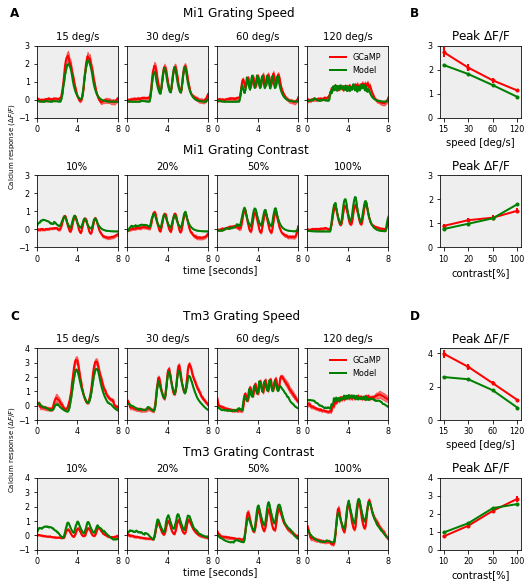

In [20]:
f = plt.figure(figsize=(7.5,10))
axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
contrast = ['10%', '20%', '50%', '100%']
xlabel = 'speed [deg/s]'
xticklabel = [15,30,60,120]
utils.plot_Mi1Tm3modelsignalsnew([Mi1_gcamp_mean[:,:4], Mi1Ca_model[:,:4]],[Mi1_gcamp_sem[:,:4],Mi1Ca_model_sem[:,:4]],
                              [Mi1_gcamp_grating_speed_peak, Mi1_model_grating_speed_peak],
                              [(-1.0,3.0),(-1.0,3.0)],0.8,axis_title,xlabel,xticklabel,c=['r','g'],legend=True)
utils.plot_Mi1Tm3modelsignalsnew([Mi1_gcamp_mean[:,[7,6,5,4]], Mi1Ca_model[:,[7,6,5,4]]],
                                 [Mi1_gcamp_sem[:,[7,6,5,4]],Mi1Ca_model_sem[:,[7,6,5,4]]],
                                 [Mi1_gcamp_grating_contrast_peak, Mi1_model_grating_contrast_peak],
                                 [(-1.0,3.0),(-1.0,3.0)],0.62,contrast,'contrast[%]',[10,20,50,100],c=['r','g'])

utils.plot_Mi1Tm3modelsignalsnew([Tm3_gcamp_mean[:,:4], Tm3Ca_model[:,:4]],[Tm3_gcamp_sem[:,:4],Tm3Ca_model_sem[:,:4]],
                                 [Tm3_gcamp_grating_speed_peak, Tm3_model_grating_speed_peak], 
                                 [(-1.0,4.0),(-1.0,4.3)],0.38,axis_title,xlabel,xticklabel,c=['r','g'],legend=True)
utils.plot_Mi1Tm3modelsignalsnew([Tm3_gcamp_mean[:,[7,6,5,4]], Tm3Ca_model[:,[7,6,5,4]]],
                                 [Tm3_gcamp_sem[:,[7,6,5,4]],Tm3Ca_model_sem[:,[7,6,5,4]]],
                                 [Tm3_gcamp_grating_contrast_peak, Tm3_model_grating_contrast_peak],
                                 [(-1.0,4.0), (-1.0,4.0)],0.20,contrast,'contrast[%]',[10,20,50,100],c=['r','g'])

f.text(0.35,0.94,'Mi1 Grating Speed',fontsize=12)
f.text(0.35,0.75,'Mi1 Grating Contrast',fontsize=12)

f.text(0.35,0.52,'Tm3 Grating Speed',fontsize=12)
f.text(0.35,0.33,'Tm3 Grating Contrast',fontsize=12)

f.text(0.35,0.585,'time [seconds]')
f.text(0.35,0.165,'time [seconds]')

f.text(0.03,0.94,'A',weight='bold',fontsize=12)
f.text(0.77,0.94,'B',weight='bold',fontsize=12)
f.text(0.03,0.52,'C',weight='bold',fontsize=12)
f.text(0.77,0.52,'D',weight='bold',fontsize=12)

f.text(0.025, 0.76, r'Calcium response $(\Delta F/F)$', color='k',fontsize=7, va='center', rotation='vertical')
f.text(0.025, 0.34, r'Calcium response $(\Delta F/F)$', color='k',fontsize=7, va='center', rotation='vertical')

plt.savefig('figures/new_figures/figure8.pdf',dpi=1000,bbox_inches='tight')

In [18]:
def plot_fig5():
    
    f = plt.figure(figsize=(7.5,10))
    
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    xlabel = 'speed [deg/s]'
    speed = [15,30,60,120]
    utils.plot_modelsignals([T4_gcamp_gratings_mean, T4Ca_model[:,[16,17,18,19,40,41,42,43]]],
                 [T4_gcamp_gratings_sem, T4Ca_model_sem[:,[16,17,18,19,40,41,42,43]]],(-1.0,3.00),0.85, axis_title,xlabel,xticklabel=speed,c=['r','g'],legend=['GCaMP','Model'])
    utils.plot_modelsignals([T4_gcamp_edge_mean, T4Ca_model[:,96:104]],
                 [T4_gcamp_edge_sem, T4Ca_model_sem[:,96:104]],(-2.0,6.00),0.50, axis_title,xlabel,xticklabel=speed,c=['r','g'],legend=['GCaMP','Model'])
    
    data_list = [T4_gcamp_mean, T4Ca_model[:,0:48]]
    sem_list = [T4_gcamp_sem, T4Ca_model_sem[:,0:48]]
    speed = [15,30,60,120]
    peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed, contrast=False)
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    #plot_polars(peak_tuning, peak_tuning_sem,0.85,axis_title)
    
    Ldir = utils.calc_Ldir(peak_tuning)
    Ldir_speed_mag = Ldir[:,:,1]
    
    
    data_list = [T4_gcamp_contrast_mean, T4Ca_model[:,48:96]]
    sem_list = [T4_gcamp_contrast_sem, T4Ca_model_sem[:,48:96]]
    contrast = [10,20,50,100]
    peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed=contrast, contrast=True)
    axis_title = ['10%', '20%', '50%', '100%']
    #plot_polars(peak_tuning, peak_tuning_sem,0.50, axis_title)
    
    Ldir = utils.calc_Ldir(peak_tuning)
    Ldir_contrast_mag = Ldir[:,:,1]
    
    xticklabel=[speed,contrast]
    
    Ldir_mag = [Ldir_speed_mag, Ldir_contrast_mag]
    utils.plot_Ldir(Ldir_mag,'contrast [%]',['r','g'],['GCaMP','Model'],xticklabel)
    
#     data = [[T4_gcamp_gratings_mean, T4Ca_model[:,[16,17,18,19,40,41,42,43]]], [T4_gcamp_edge_mean, T4Ca_model[:,96:104]]]
#     utils.plot_DSI(data, 'speed [deg/s]',xticklabel)
    
    
    
    
    f.text(0.35,0.98,'Grating Speed',fontsize=12)
    f.text(0.35,0.63,'Edge Speed',fontsize=12)
    f.text(0.35,0.665,'time [seconds]')
    f.text(0.35,0.313,'time [seconds]')
    f.text(0.03,0.98,'A',weight='bold',fontsize=12)
    f.text(0.77,0.98,'B',weight='bold',fontsize=12)
    f.text(0.03,0.63,'C',weight='bold',fontsize=12)
    f.text(0.77,0.63,'D',weight='bold',fontsize=12)
    f.text(0.165,0.27,'E',weight='bold',fontsize=12)
    f.text(0.515,0.27,'F',weight='bold',fontsize=12)
    f.text(0.007, 0.832, r'Calcium response $(\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    #f.text(0.76, 0.832, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    f.text(0.007, 0.482, r'Calcium response $(\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    #f.text(0.76, 0.482, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    
    
    plt.savefig('figures/new_figures/figure5_MModel.pdf',dpi=1000)

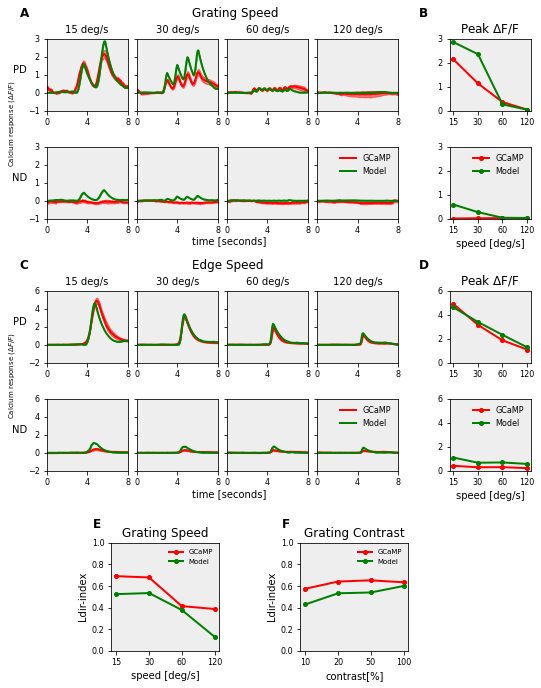

In [19]:
plot_fig5()

In [84]:
x_values = np.arange(105)*(1/13.0)

In [85]:
x_values

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        , 1.07692308,
       1.15384615, 1.23076923, 1.30769231, 1.38461538, 1.46153846,
       1.53846154, 1.61538462, 1.69230769, 1.76923077, 1.84615385,
       1.92307692, 2.        , 2.07692308, 2.15384615, 2.23076923,
       2.30769231, 2.38461538, 2.46153846, 2.53846154, 2.61538462,
       2.69230769, 2.76923077, 2.84615385, 2.92307692, 3.        ,
       3.07692308, 3.15384615, 3.23076923, 3.30769231, 3.38461538,
       3.46153846, 3.53846154, 3.61538462, 3.69230769, 3.76923077,
       3.84615385, 3.92307692, 4.        , 4.07692308, 4.15384615,
       4.23076923, 4.30769231, 4.38461538, 4.46153846, 4.53846154,
       4.61538462, 4.69230769, 4.76923077, 4.84615385, 4.92307692,
       5.        , 5.07692308, 5.15384615, 5.23076923, 5.30769231,
       5.38461538, 5.46153846, 5.53846154, 5.61538462, 5.69230